##  두 데이터를 합쳐서 자치구별 시간대별 유동인구와 충전수 비교

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/cryptnomy/likelion-ai-s7-mid/master/data/hypo_1_pre.csv')
df_1

,기준일ID,시간대구분,자치구코드,총생활인구수,20세 이상 생활인구수,자치구,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
0,20210101,0,11110,194924.6184,170323.2282,종로구,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20210101,0,11140,148826.8808,134170.4024,중구,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20210101,0,11170,250141.2136,218995.3640,용산구,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20210101,0,11200,315490.0745,269994.4514,성동구,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20210101,0,11215,360268.0149,309288.4528,광진구,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218995,20211231,23,11620,472514.0761,420763.0763,관악구,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
218996,20211231,23,11650,455062.9561,368457.5021,서초구,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
218997,20211231,23,11680,626466.4158,508774.0590,강남구,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
218998,20211231,23,11710,712411.1104,585397.4400,송파구,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df_2 = pd.read_parquet('https://github.com/cryptnomy/likelion-ai-s7-mid/blob/master/data/hypo_2.parqeut.gzip?raw=true')
df_2

,충전구분,충전소명,주소,충전량,충전시작시각,충전종료시각,자치구,자치구코드,급속충전기(대),완속충전기(대),...,14,15,16,17,18,19,20,21,22,23
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,0.050000,2021-01-01 02:06:20,2021-01-01 02:06:36,영등포구,11560,1,2,...,0,0,0,0,0,0,0,0,0,0
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,13.100000,2021-01-02 14:58:37,2021-01-02 15:28:25,영등포구,11560,1,2,...,1,1,0,0,0,0,0,0,0,0
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,47.560001,2021-01-02 20:57:53,2021-01-02 22:31:46,영등포구,11560,1,2,...,0,0,0,0,0,0,1,1,1,0
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,24.770000,2021-01-04 12:12:02,2021-01-04 12:51:01,영등포구,11560,1,2,...,0,0,0,0,0,0,0,0,0,0
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,19.209999,2021-01-04 22:51:11,2021-01-04 23:21:04,영등포구,11560,1,2,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717365,완속,서울전력관리처,서울특별시 중구 퇴계로 140,61.189999,2022-03-01 00:00:00,2022-03-01 03:55:02,중구,11140,1,2,...,0,0,0,0,0,0,0,0,0,0
717366,급속,서울전력관리처,서울특별시 중구 퇴계로 140,11.250000,2022-03-03 00:00:00,2022-03-03 08:23:23,중구,11140,1,2,...,0,0,0,0,0,0,0,0,0,0
717367,급속,서울전력관리처,서울특별시 중구 퇴계로 140,13.140000,2022-03-11 00:00:00,2022-03-11 00:38:46,중구,11140,1,2,...,0,0,0,0,0,0,0,0,0,0
717368,완속,서울전력관리처,서울특별시 중구 퇴계로 140,61.099998,2022-03-15 00:00:00,2022-03-15 03:05:02,중구,11140,1,2,...,0,0,0,0,0,0,0,0,0,0


## 자치구별 시간대별 유동인구와 충전수 비교 이중축 시각화 시도


- 1번 데이터 자치구별 시간대별 유동인구 수
- 2번 데이터 자치구별 시간대별 충전 수

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib

In [5]:
data_gu_time = df_1.iloc[:, [1, 4, 5]].groupby(['자치구', '시간대구분']).mean().reset_index()
data_gu_time

,자치구,시간대구분,20세 이상 생활인구수
0,강남구,0,525924.179479
1,강남구,1,522266.005565
2,강남구,2,520027.073107
3,강남구,3,518860.538767
4,강남구,4,519654.197621
...,...,...,...
595,중랑구,19,302354.171113
596,중랑구,20,308587.343826
597,중랑구,21,314073.778034
598,중랑구,22,319403.270726


In [6]:
data_gu_unique = data_gu_time['자치구'].unique()

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=6, cols=4,
                    start_cell='top-left',
                    subplot_titles=tuple(data_gu_unique))

for i in range(1, 7):
    for j in range(1, 5):
        gu = data_gu_unique[(i-1)*4+(j-1)]
        data_temp = data_gu_time[data_gu_time['자치구'] == f'{gu}']
        fig.add_trace(go.Scatter(x=data_temp['시간대구분'],\
                                 y=data_temp['20세 이상 생활인구수']),\
                                 row=i, col=j)

fig.update_layout(showlegend=False, height=1200, width=1600,\
                 title_text="자치구별 생활인구수 시간 변화")
fig.show()

In [8]:
time_list = [x for x in range(24)]
df_2 = df_2.rename(columns = {str(x) : x for x in range(24)})

In [9]:
df_2.pivot_table(index = '자치구', values = time_list, aggfunc = 'sum')
gu_time = pd.DataFrame(df_2.pivot_table(index = '자치구', values = time_list, aggfunc = 'sum').stack())
gu_time = gu_time.reset_index().rename(columns = {'level_1' : '시간대'})
gu_time = gu_time.rename(columns={0:"충전빈도수"})
gu_time

,자치구,시간대,충전빈도수
0,강남구,0,13183
1,강남구,1,11204
2,강남구,2,9431
3,강남구,3,7747
4,강남구,4,6316
...,...,...,...
595,중랑구,19,2729
596,중랑구,20,3159
597,중랑구,21,3350
598,중랑구,22,3041


In [10]:
gu_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     600 non-null    object
 1   시간대     600 non-null    int64 
 2   충전빈도수   600 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.2+ KB


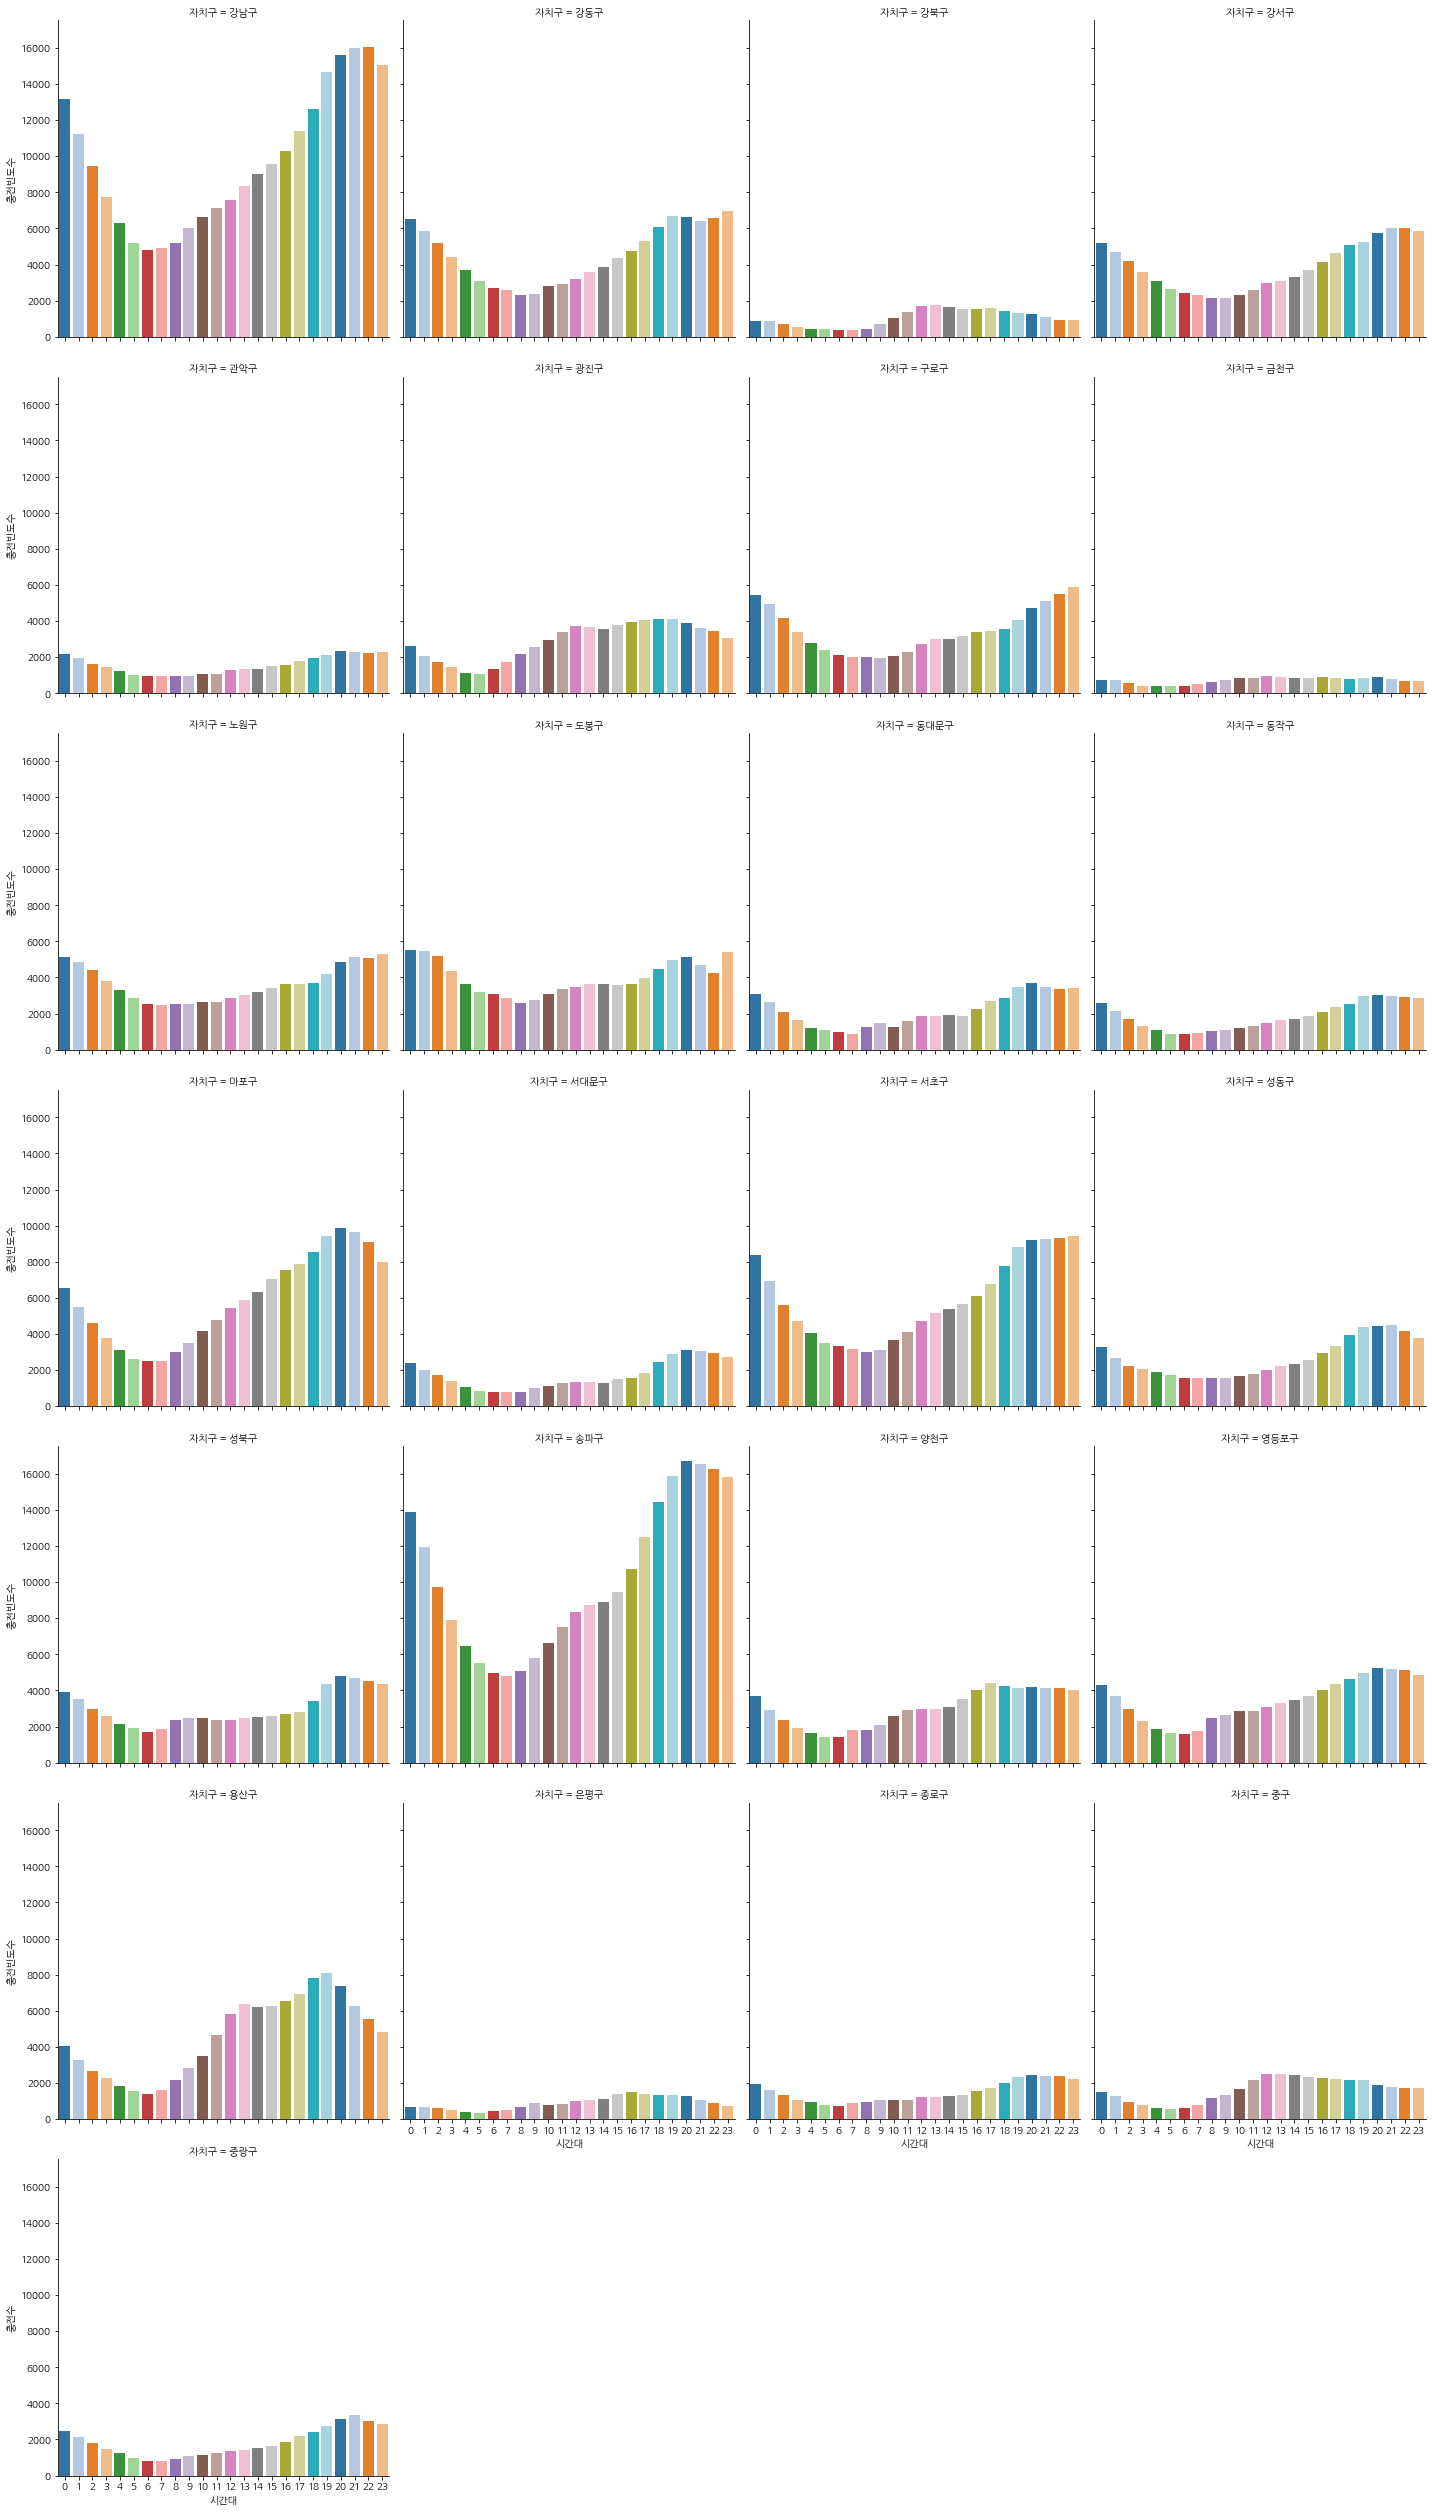

In [11]:
import koreanize_matplotlib

sns.catplot(data = gu_time, x='시간대', y="충전빈도수", ci = None, kind = 'bar', col = '자치구', col_wrap = 4, palette = 'tab20')
plt.ylabel('충전수');

## 이중축 시각화 시작

In [12]:
data_gu_time = df_1.iloc[:, [1, 4, 5]].groupby(['자치구', '시간대구분']).mean().reset_index()
data_gu_time

,자치구,시간대구분,20세 이상 생활인구수
0,강남구,0,525924.179479
1,강남구,1,522266.005565
2,강남구,2,520027.073107
3,강남구,3,518860.538767
4,강남구,4,519654.197621
...,...,...,...
595,중랑구,19,302354.171113
596,중랑구,20,308587.343826
597,중랑구,21,314073.778034
598,중랑구,22,319403.270726


In [13]:
data_gu_time = data_gu_time.rename(columns = {'시간대구분' : '시간대'})

compare_time = pd.merge(data_gu_time, gu_time)
compare_time

,자치구,시간대,20세 이상 생활인구수,충전빈도수
0,강남구,0,525924.179479,13183
1,강남구,1,522266.005565,11204
2,강남구,2,520027.073107,9431
3,강남구,3,518860.538767,7747
4,강남구,4,519654.197621,6316
...,...,...,...,...
595,중랑구,19,302354.171113,2729
596,중랑구,20,308587.343826,3159
597,중랑구,21,314073.778034,3350
598,중랑구,22,319403.270726,3041


In [14]:
gu_list = compare_time['자치구'].unique().tolist()

In [15]:
compare_time[compare_time['자치구'] == '강남구'][['시간대','충전빈도수']]

,시간대,충전빈도수
0,0,13183
1,1,11204
2,2,9431
3,3,7747
4,4,6316
5,5,5176
6,6,4777
7,7,4903
8,8,5211
9,9,6013


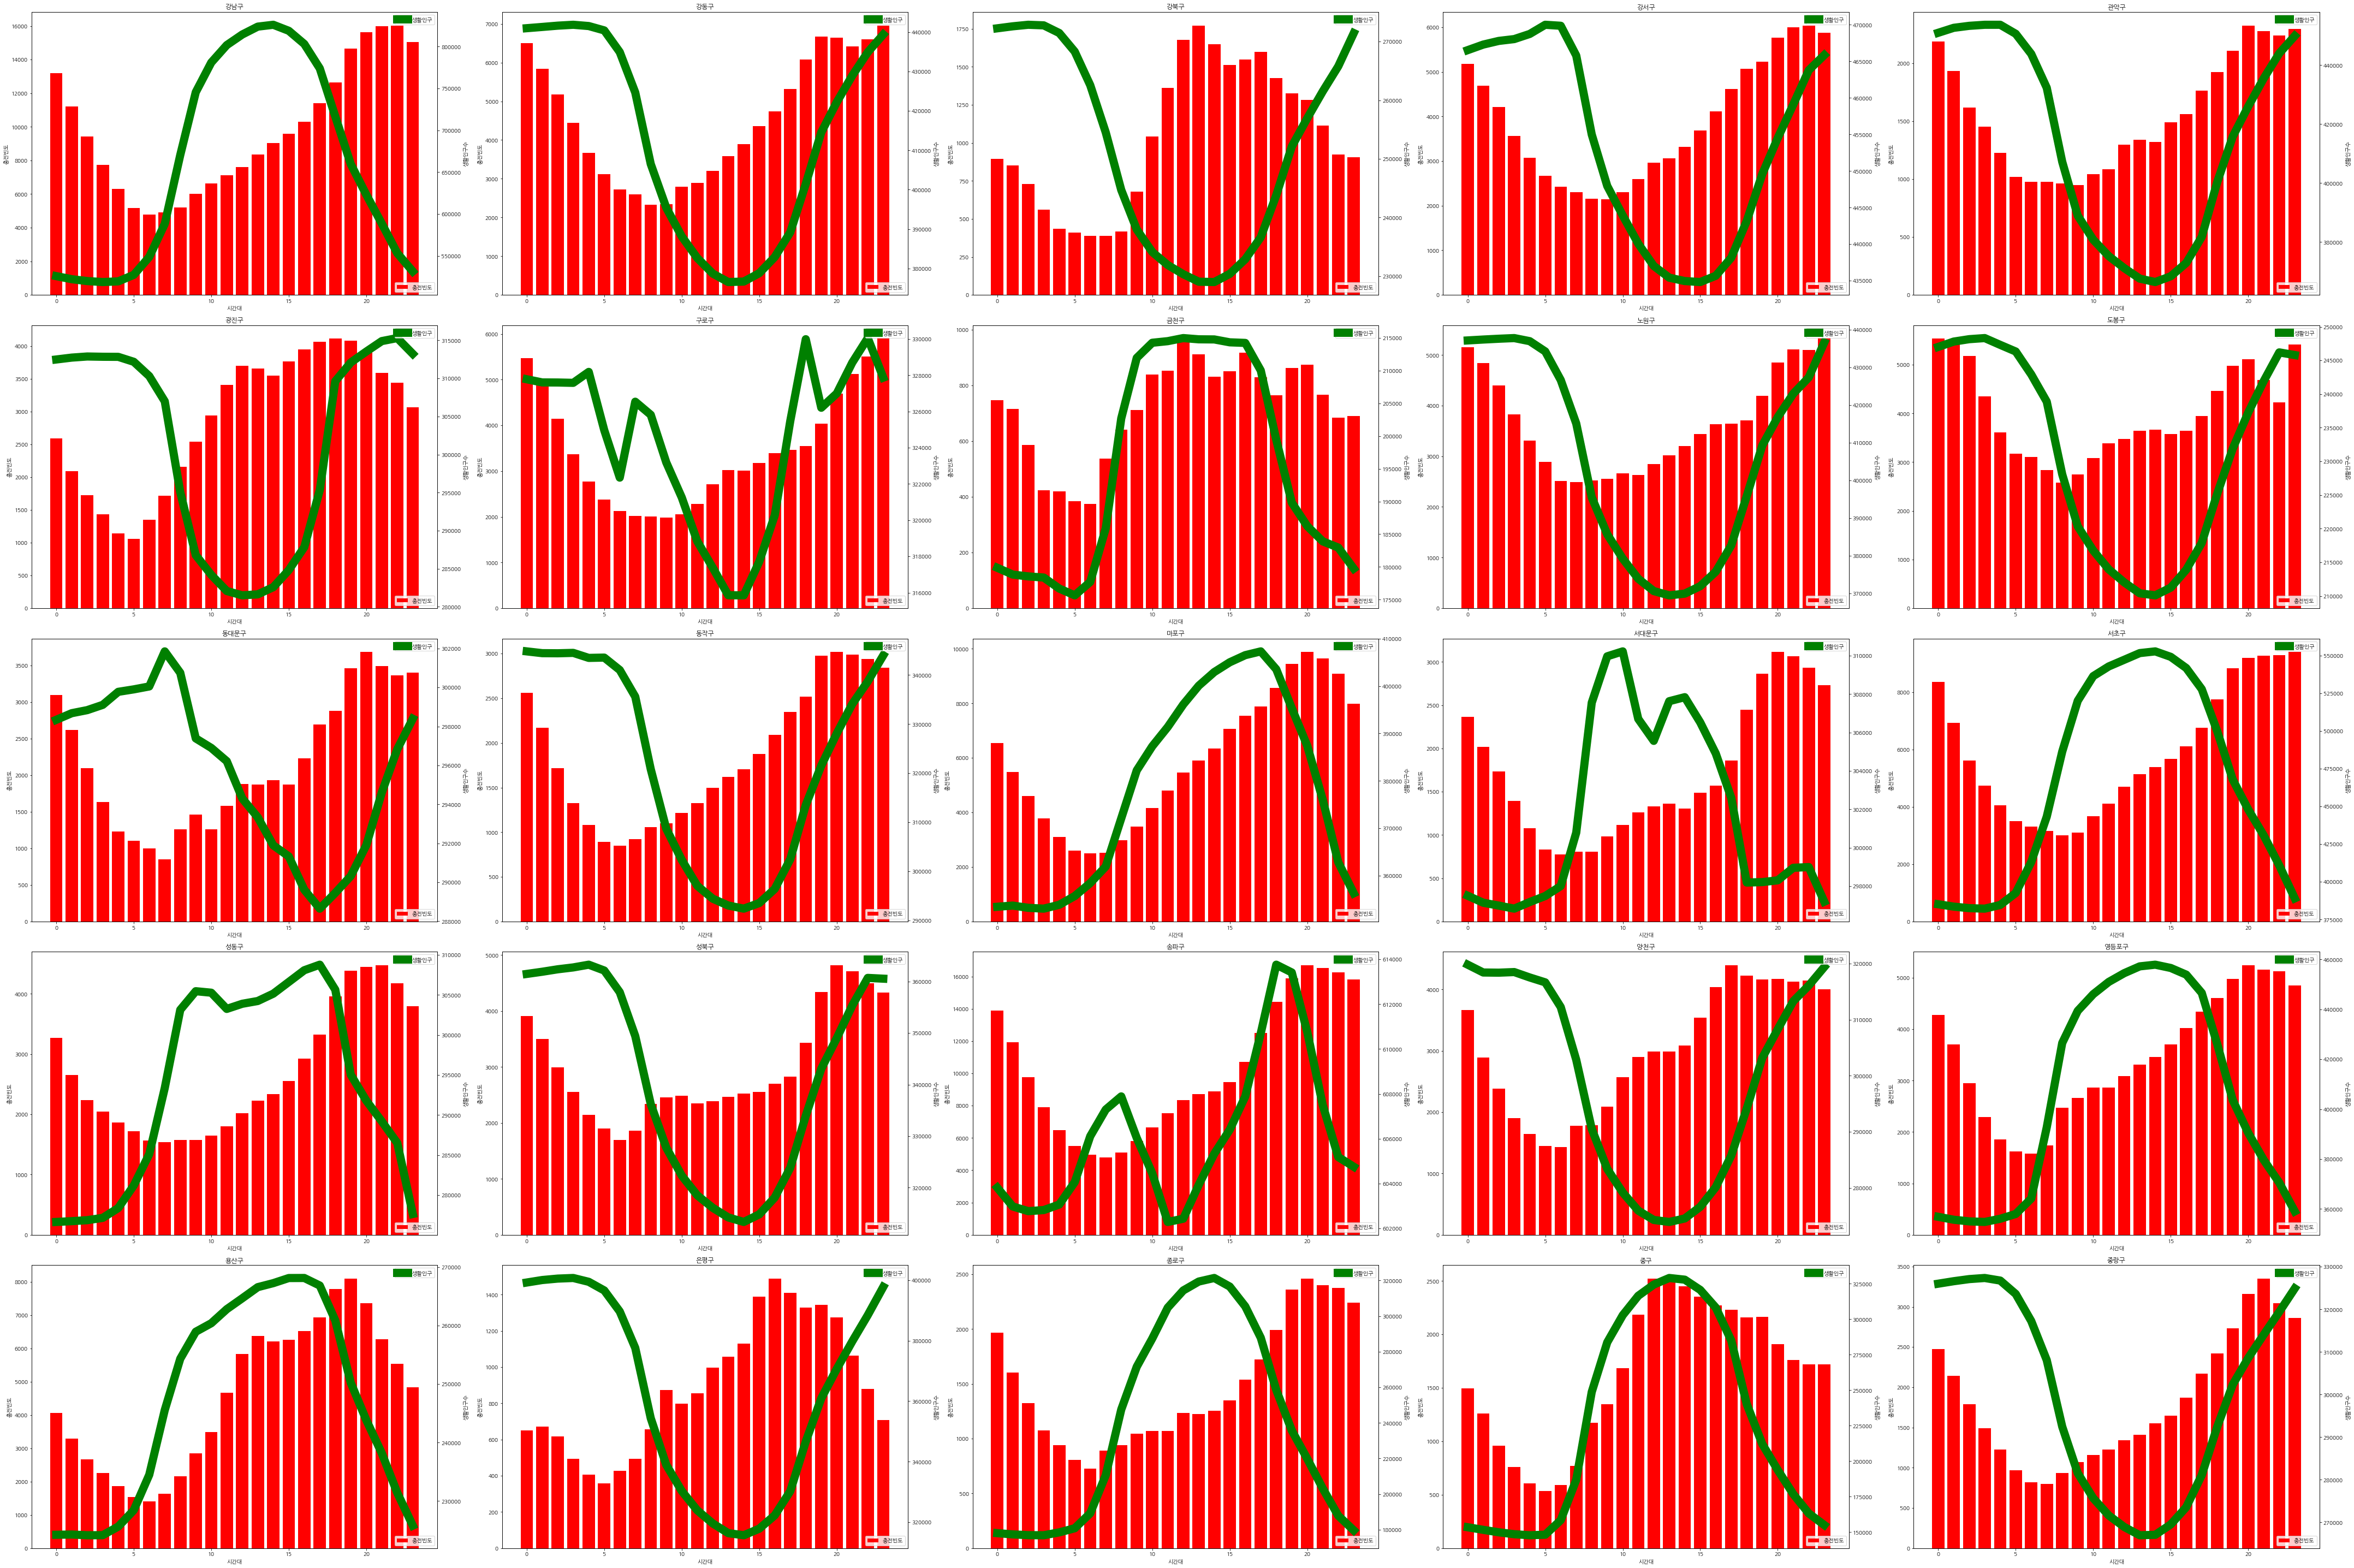

In [16]:
gu_list = compare_time['자치구'].unique().tolist()

fig, axes = plt.subplots(5,5, figsize = (60,40))
axes2 = axes.copy()

for i in range(5) :
    
    for j in range(5):
        y1 = compare_time[compare_time['자치구'] == gu_list[5 * i + j]][['시간대','충전빈도수']]['충전빈도수']
        y2 = compare_time[compare_time['자치구'] == gu_list[5 * i + j]][['시간대','20세 이상 생활인구수']]['20세 이상 생활인구수']

        axes[i,j].set_xlabel('시간대')
        axes[i,j].set_ylabel('충전빈도')
        axes[i,j].bar(time_list, y1, color='r', label='충전빈도')
        axes[i,j].legend(loc='lower right')
        axes[i,j].set_title(gu_list[5 * i + j])
        
        axes2[i,j] = axes[i,j].twinx()
        
        axes2[i,j].set_xlabel('시간대')
        axes2[i,j].set_ylabel('생활인구수')
        axes2[i,j].plot(time_list, y2, color='g', label='생활인구', linewidth = '15')
        axes2[i,j].legend(loc='upper right')

plt.tight_layout()
plt.show()